<a href="https://colab.research.google.com/github/WilliamAshbee/3d-synth-data/blob/main/3d2dprepwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
a = np.array([i for i in range(16)])

In [3]:
a = a.reshape(-1,1,1).repeat(16,axis=1).repeat(16,axis=2)

In [4]:
x = a.copy()
y = a.transpose(1,0,2)
z = a.transpose(2,1,0)


In [5]:
print(x[:,0,0])
print(y[0,:,0])
print(z[0,0,:])
assert(x[:,0,0].sum()==y[0,:,0].sum())
assert(z[0,0,:].sum()==y[0,:,0].sum())
assert(x[:,0,0].sum()!=0)

a = z.copy()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [7]:
x3dind = []
y3dind = []
z3dind = []

x2dind = []
y2dind = []

for i in range(16):
  for j in range(16):
    for k in range(16):
      x3dind.append(i)
      y3dind.append(j)
      z3dind.append(k)
      
      x2dind.append(i*4+k%4)
      y2dind.append(j*4+k//4)

      



In [8]:
#x2d[8:12,8:12]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [9]:
def get2dfrom3d(a):
  
  a = np.array([i for i in range(16)])
  
  x = a.copy()
  y = a.transpose(1,0,2)
  z = a.transpose(2,1,0)

  x2d = np.zeros((64,64))
  y2d = np.zeros_like(x2d)
  z2d = np.zeros_like(x2d)

  x2d[y2dind,x2dind] = x[y3dind,x3dind,z3dind]
  y2d[y2dind,x2dind] = y[y3dind,x3dind,z3dind]
  z2d[y2dind,x2dind] = z[y3dind,x3dind,z3dind]

  print(x2d[y2dind,x2dind].shape,x[y3dind,x3dind,z3dind].shape)
  print(y2d[y2dind,x2dind].shape,y[y3dind,x3dind,z3dind].shape)
  print(z2d[y2dind,x2dind].shape,z[y3dind,x3dind,z3dind].shape)
  print(x2d[y2dind,x2dind].sum(),x[y3dind,x3dind,z3dind].sum())
  print(y2d[y2dind,x2dind].sum(),y[y3dind,x3dind,z3dind].sum())
  print(z2d[y2dind,x2dind].sum(),z[y3dind,x3dind,z3dind].sum())
  assert((x2d[y2dind,x2dind].astype(int)!=x[y3dind,x3dind,z3dind].astype(int)).sum() == 0)
  assert((y2d[y2dind,x2dind].astype(int)!=y[y3dind,x3dind,z3dind].astype(int)).sum() == 0)
  assert((z2d[y2dind,x2dind].astype(int)!=z[y3dind,x3dind,z3dind].astype(int)).sum() == 0)
  assert z2d[y2dind,x2dind].shape[0] == len(x2dind)
  assert(int(y2d[y2dind,x2dind].sum())== int(y[y3dind,x3dind,z3dind].sum()))
  assert(int(z2d[y2dind,x2dind].sum())== int(z[y3dind,x3dind,z3dind].sum()))
  assert(int(x2d[y2dind,x2dind].sum())== int(y[y3dind,x3dind,z3dind].sum()))
  assert(int(y2d[y2dind,x2dind].sum())== int(z[y3dind,x3dind,z3dind].sum()))
  assert(int(y2d[y2dind,x2dind].sum())!= 0)
  for i in range(16):
    for j in range(16):
      print('i,j,val',i,j,x2d[4*i:4*(i+1),j*4:(j+1)*4])
      
  for i in range(16):
    for j in range(16):
      print('i,j,val',i,j,y2d[4*i:4*(i+1),j*4:(j+1)*4])

  for i in range(16):
    for j in range(16):
      print('i,j,val',i,j,z2d[4*i:4*(i+1),j*4:(j+1)*4])
      assert z2d[4*i:4*(i+1),j*4:(j+1)*4][0,1] == 1
      assert z2d[4*i:4*(i+1),j*4:(j+1)*4][1,0] == 4

(4096,) (4096,)
(4096,) (4096,)
(4096,) (4096,)
30720.0 30720
30720.0 30720
30720.0 30720


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
 [[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]]
0.0 1.0


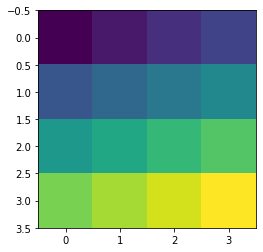

In [12]:
import matplotlib.pyplot as plt

a2d = np.zeros((64,64))
a2d[y2dind,x2dind] = a[y3dind,x3dind,z3dind]

plt.clf()
plt.imshow(a2d[:4,:4])
print(a[0,0,:],'\n', a2d[:4,:4])

print(a2d[0,0],a2d[0,1])
assert a2d[0,0] == 0
assert a2d[0,1] == 1
assert a2d[1,0] == 4

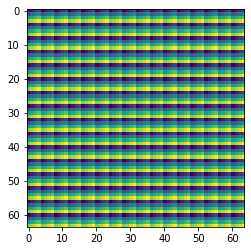

In [13]:
plt.clf()
plt.imshow(a2d)
